In [1]:
# Import necessary libraries
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and ensure matplotlib plots are displayed inline
sns.set_style('whitegrid')
%matplotlib inline

# Set the data source and API key for retrieving financial data
data_source = 'tiingo'
api_key = 'Get free api key from tiingo when you sign up for an account'

# Define the start and end dates for data retrieval
start_date = '2019-01-01'
end_date = '2023-06-01'

# Define columns to remove from the retrieved data
columns_to_remove = ['adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']

# Create an empty dictionary to store modified data
modified_data = {}

# Define lists of stock symbols for different industries
health = ['JNJ', 'PFE', 'MRK', 'UNH', 'ABT']
tech = ['AAPL', 'MSFT', 'AMZN', 'DELL', 'META']
fin = ['JPM', 'BAC', 'WFC', 'C', 'GS']
retail = ['WMT', 'AMZN', 'COST', 'KR', 'HD']
manfact = ['GE', 'BA', 'MMM', 'CAT', 'PG']


In [2]:
# Define a function to create a dataframe for a given list of tickers
def industry_dataframe(tickers):
    modified_data = {}

    # Retrieve data for each symbol and preprocess it
    for symbol in tickers:
        raw_data = pdr.DataReader(symbol, data_source, start_date, end_date, api_key=api_key)
        col_drop = raw_data.drop(columns=columns_to_remove)
        col_drop.reset_index(level='symbol', drop=True, inplace=True)
        col_drop.index = col_drop.index.date
        modified_data[symbol] = col_drop

    # Assign each modified dataframe to a global variable with the symbol's name
    for key, value in modified_data.items():
        globals()[key] = value

# Call the industry_dataframe function for different industry lists
industry_dataframe(health)
industry_dataframe(tech)
industry_dataframe(fin)
industry_dataframe(retail)
industry_dataframe(manfact)

C:\Users\cmcmorland\AppData\Local\Temp\ipykernel_20128\2243007336.py:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  raw_data = pdr.DataReader(symbol, data_source, start_date, end_date, api_key=api_key)
C:\Users\cmcmorland\AppData\Local\Temp\ipykernel_20128\2243007336.py:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  raw_data = pdr.DataReader(symbol, data_source, start_date, end_date, api_key=api_key)
C:\Users\cmcmorland\AppData\Local\Temp\ipykernel_20128\2243007336.py:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  raw_data = pdr.DataReader(symbol, data_source, start_date, end_date, api_key=api_key)
C:\Users\cmcmorland\AppData\Local\Temp\ipykernel_20128\2243007336.py:7: FutureWarning: In a future version of pandas all arguments of concat except for th

In [3]:
# Create dictionaries to associate stock symbols with their respective dataframes
health_stocks = {'JNJ': JNJ, 'PFE': PFE, 'MRK': MRK, 'UNH': UNH, 'ABT': ABT}
tech_stocks = {'AAPL': AAPL, 'MSFT': MSFT, 'AMZN': AMZN, 'DELL': DELL, 'META': META}
fin_stocks = {'JPM': JPM, 'BAC': BAC, 'WFC': WFC, 'C': C, 'GS': GS}
retail_stocks = {'WMT': WMT, 'AMZN': AMZN, 'COST': COST, 'KR': KR, 'HD': HD}
manfact_stocks = {'GE': GE, 'BA': BA, 'MMM': MMM, 'CAT': CAT, 'PG': PG}

# Create lists of dictionaries and names for each industry's stock data
combine_stocks = [health_stocks, tech_stocks, fin_stocks, retail_stocks, manfact_stocks]
name_stocks = ['health_index', 'tech_index', 'fin_index', 'retail_index', 'manfact_index']

# Define a function to combine stock dataframes and condition their structure
def df_condition(name_list, df_stock_list):
    result = []

    # Combine and structure dataframes for each industry
    for i in range(len(name_list)):
        name_list[i] = pd.concat(df_stock_list[i], axis=1, keys=df_stock_list[i].keys())
        name_list[i].columns.names = ['Ticker', 'Stock Info']
        result.append(name_list[i])

    return result

# Combine stock dataframes for each industry and create conditioned dataframes
df_index_combine = df_condition(name_stocks, combine_stocks)

In [4]:
# Assign the conditioned dataframes to global variables
name_index = ['health_index', 'tech_index', 'fin_index', 'retail_index', 'manfact_index']
for i, name in enumerate(name_index):
    globals()[name] = df_index_combine[i]

Text(0.5, 1.0, 'Stock performance between 2019 and 2023 for tech industry')

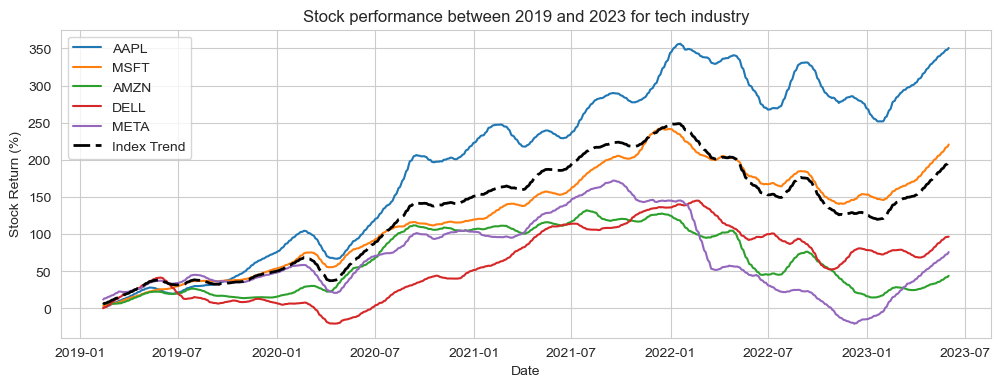

In [5]:
# Extract adjusted close data for the tech industry
close_data = tech_index.xs('adjClose', level='Stock Info', axis=1)

# Plot stock return trends for individual tech stocks and industry index trend
plt.figure(figsize=(12, 4))
norm_data = ((close_data / close_data.iloc[0]) * 100) - 100
index_trend = (norm_data.sum(axis=1)) / (len(norm_data.columns) - 1)

# Plot individual stock return trends
for column in norm_data.columns:
    sns.lineplot(x=norm_data.index, y=norm_data[column].rolling(window=30).mean(), label=column)

# Plot industry index trend
sns.lineplot(x=norm_data.index, y=index_trend.rolling(window=30).mean(), color='black', linewidth=2, dashes=[6, 2], label='Index Trend')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Stock Return (%)')
plt.title('Stock performance between 2019 and 2023 for tech industry')

Text(0.5, 1.0, 'Stock performance between 2019 and 2023 for health industry')

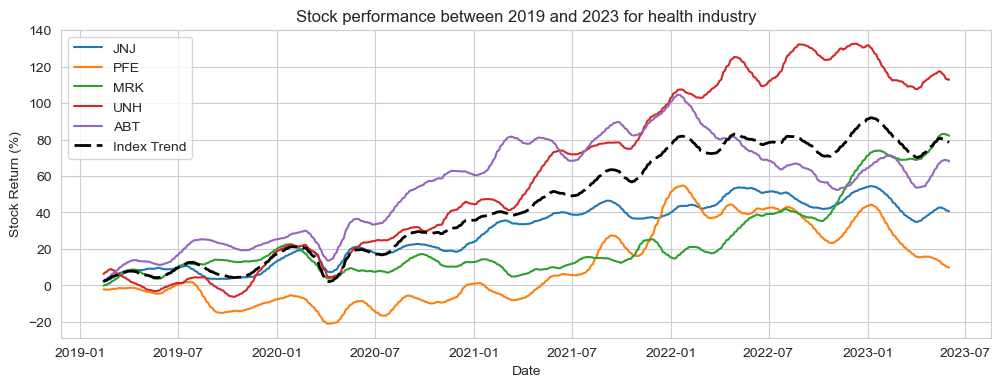

In [6]:
close_data = health_index.xs('adjClose', level='Stock Info', axis = 1)
plt.figure(figsize=(12, 4))
norm_data = ((close_data / close_data.iloc[0])*100)-100
index_trend = (norm_data.sum(axis=1))/(len(norm_data.columns)-1)

# Plot multiple line plots using a loop
for column in norm_data.columns:
    sns.lineplot(x=norm_data.index, y=norm_data[column].rolling(window=30).mean(), label=column)

sns.lineplot(x=norm_data.index, y=index_trend.rolling(window=30).mean(),color='black', linewidth=2, dashes=[6, 2],label='Index Trend')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Return (%)')
plt.title('Stock performance between 2019 and 2023 for health industry')

Text(0.5, 1.0, 'Stock performance between 2019 and 2023 for finance industry')

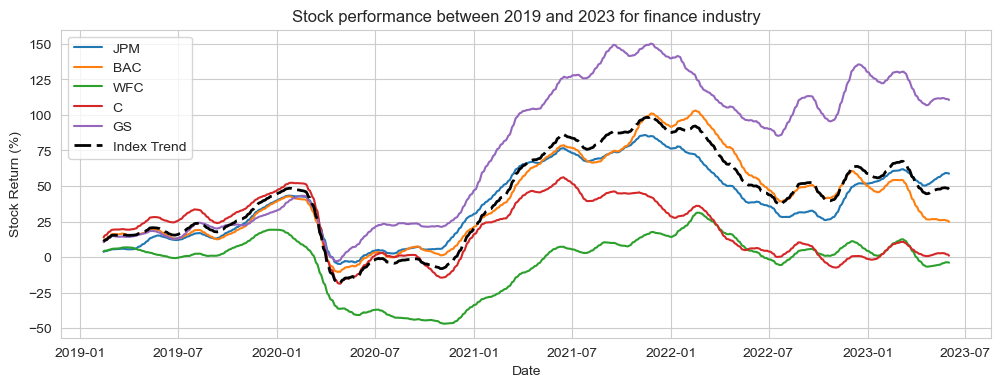

In [10]:
close_data = fin_index.xs('adjClose', level='Stock Info', axis = 1)
plt.figure(figsize=(12, 4))
norm_data = ((close_data / close_data.iloc[0])*100)-100
index_trend = (norm_data.sum(axis=1))/(len(norm_data.columns)-1)

# Plot multiple line plots using a loop
for column in norm_data.columns:
    sns.lineplot(x=norm_data.index, y=norm_data[column].rolling(window=30).mean(), label=column)

sns.lineplot(x=norm_data.index, y=index_trend.rolling(window=30).mean(),color='black', linewidth=2, dashes=[6, 2],label='Index Trend')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Return (%)')
plt.title('Stock performance between 2019 and 2023 for finance industry')

Text(0.5, 1.0, 'Stock performance between 2019 and 2023 for manufacturing industry')

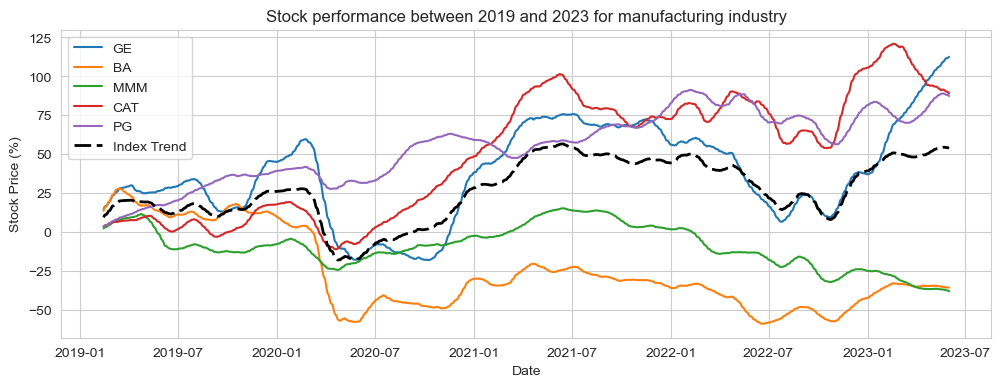

In [9]:
close_data = manfact_index.xs('adjClose', level='Stock Info', axis = 1)
plt.figure(figsize=(12, 4))
norm_data = ((close_data / close_data.iloc[0])*100)-100
index_trend = (norm_data.sum(axis=1))/(len(norm_data.columns)-1)

# Plot multiple line plots using a loop
for column in norm_data.columns:
    sns.lineplot(x=norm_data.index, y=norm_data[column].rolling(window=30).mean(), label=column)

sns.lineplot(x=norm_data.index, y=index_trend.rolling(window=30).mean(),color='black', linewidth=2, dashes=[6, 2],label='Index Trend')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price (%)')
plt.title('Stock performance between 2019 and 2023 for manufacturing industry')


Text(0.5, 1.0, 'Stock performance between 2019 and 2023 for retail industry')

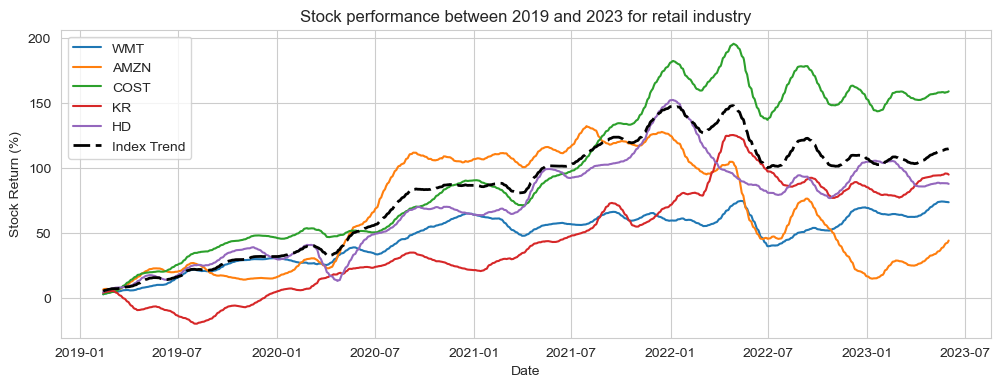

In [8]:
close_data = retail_index.xs('adjClose', level='Stock Info', axis = 1)
plt.figure(figsize=(12, 4))
norm_data = ((close_data / close_data.iloc[0])*100)-100
index_trend = (norm_data.sum(axis=1))/(len(norm_data.columns)-1)

# Plot multiple line plots using a loop
for column in norm_data.columns:
    sns.lineplot(x=norm_data.index, y=norm_data[column].rolling(window=30).mean(), label=column)

sns.lineplot(x=norm_data.index, y=index_trend.rolling(window=30).mean(),color='black', linewidth=2, dashes=[6, 2],label='Index Trend')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Return (%)')
plt.title('Stock performance between 2019 and 2023 for retail industry')


In [11]:
# Define a function to calculate industry index trend
def index_trend(DataFrame):
    close_data = DataFrame.xs('adjClose', level='Stock Info', axis=1)
    norm_data = ((close_data / close_data.iloc[0]) * 100) - 100
    index_trend = (norm_data.sum(axis=1)) / (len(norm_data.columns) - 1)
    return index_trend

In [12]:
# Calculate index trends for each industry
tech_idx = index_trend(tech_index)
health_idx = index_trend(health_index)
fin_idx = index_trend(fin_index)
manfact_idx = index_trend(manfact_index)
retail_idx = index_trend(retail_index)

In [14]:
# Create a dictionary to store index trends for all industries
idx_dict = {
    'Technology': tech_idx,
    'Healthcare': health_idx,
    'Finance': fin_idx,
    'Manufacturing': manfact_idx,
    'Retail': retail_idx,
}

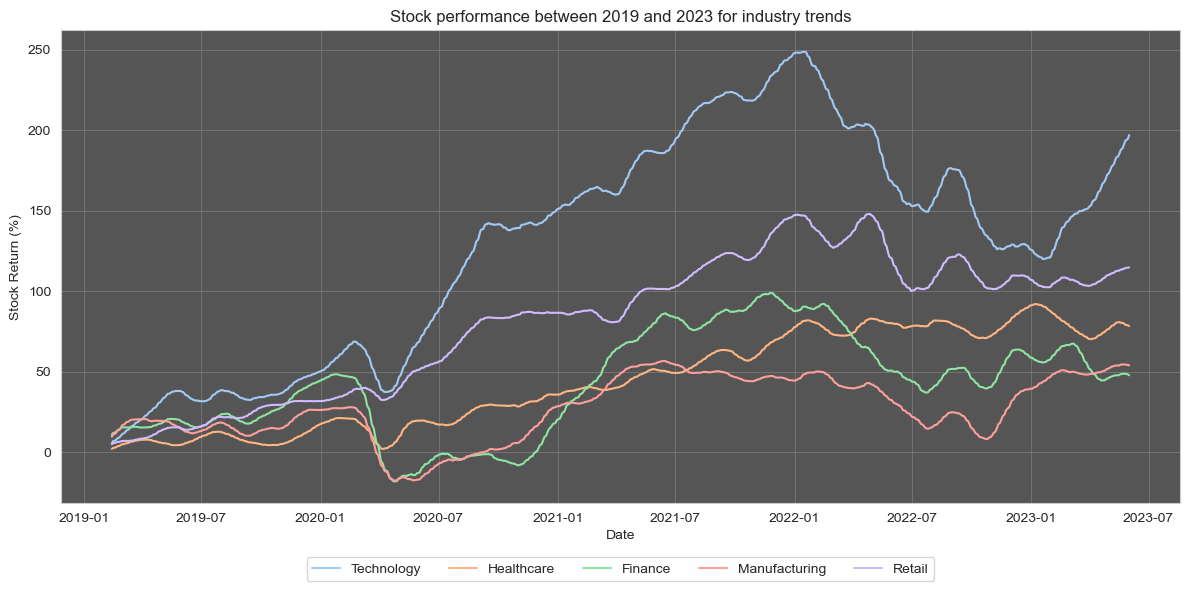

In [15]:
# Create a dataframe from the index trend dictionary
IdxTrendAll = pd.DataFrame(idx_dict)

# Plot index trends for all industries
plt.figure(figsize=(12, 6))
sns.set_palette('pastel')

for column in IdxTrendAll.columns:
    sns.lineplot(x=IdxTrendAll.index, y=IdxTrendAll[column].rolling(window=30).mean(), label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Return (%)')
plt.title('Stock performance between 2019 and 2023 for industry trends')

# Move the legend to the bottom outside the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(IdxTrendAll.columns))

# Adjust layout
plt.tight_layout()
plt.gca().set_facecolor('#555555')
plt.grid(color='grey', linestyle='-', linewidth=0.5)


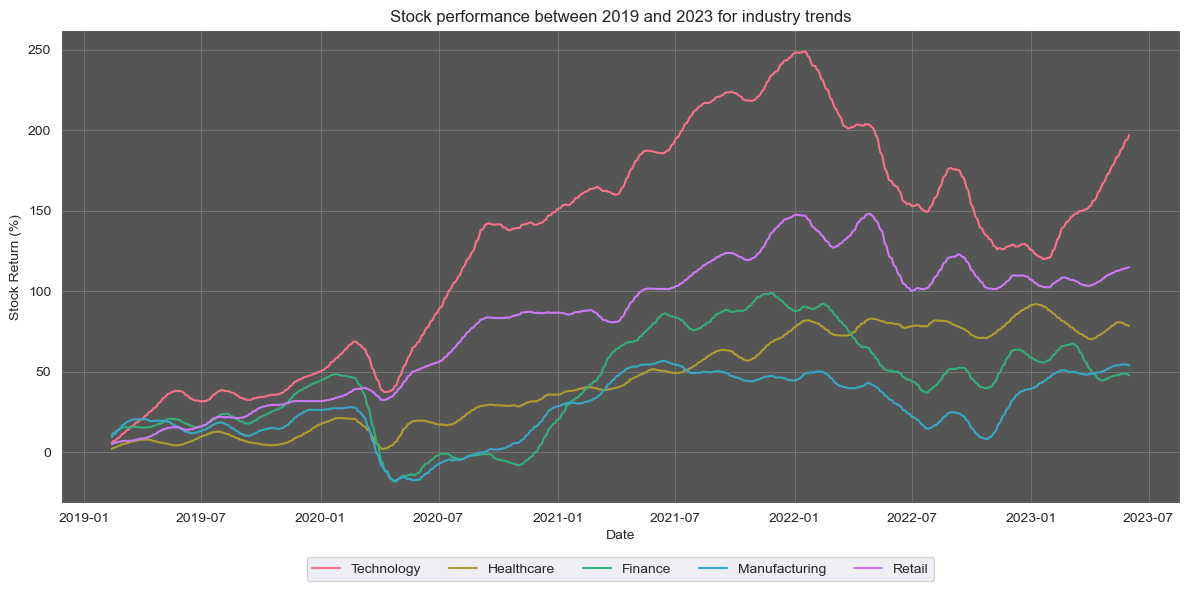

In [44]:
plt.figure(figsize=(12, 6))
#sns.set_style('dark')
sns.set_palette(sns.husl_palette(n_colors=5))
#sns.set_palette('pastel')

for column in IdxTrendAll.columns:
    sns.lineplot(x=IdxTrendAll.index, y=IdxTrendAll[column].rolling(window=30).mean(), label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Return (%)')
plt.title('Stock performance between 2019 and 2023 for industry trends')

# Move the legend to the bottom outside the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(IdxTrendAll.columns))

# Adjust layout
plt.tight_layout()
plt.gca().set_facecolor('#555555')
plt.grid(color='grey', linestyle='-', linewidth=0.5)